In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
experiment_folders = glob.glob("../experiment_output/mel2_*exper*")
print(sorted(experiment_folders))

['../experiment_output/mel2_exper1', '../experiment_output/mel2_exper10', '../experiment_output/mel2_exper10_batchin', '../experiment_output/mel2_exper11', '../experiment_output/mel2_exper11_batchin', '../experiment_output/mel2_exper12', '../experiment_output/mel2_exper12_batchin', '../experiment_output/mel2_exper13', '../experiment_output/mel2_exper13_batchin', '../experiment_output/mel2_exper14', '../experiment_output/mel2_exper14_batchin', '../experiment_output/mel2_exper15', '../experiment_output/mel2_exper15_batchin', '../experiment_output/mel2_exper16', '../experiment_output/mel2_exper16_batchin', '../experiment_output/mel2_exper17', '../experiment_output/mel2_exper17_batchin', '../experiment_output/mel2_exper1_batchin', '../experiment_output/mel2_exper2', '../experiment_output/mel2_exper2_batchin', '../experiment_output/mel2_exper3', '../experiment_output/mel2_exper3_batchin', '../experiment_output/mel2_exper4', '../experiment_output/mel2_exper4_batchin', '../experiment_output/m

In [4]:
def get_aggregate_df(dataset_fname):
    metrics = [
        'Overall Accuracy',
        'Raw Pitch Accuracy',
        'Raw Chroma Accuracy',
        'Voicing Recall',
        'Voicing False Alarm'
    ]

    scores_mean = {m: [] for m in metrics}
    scores_std = {m: [] for m in metrics}
    model_key = []
    data_frames = []
    
    experiment_folders = []
    for i in range(17):
        experiment_folders.append("../experiment_output/mel2_exper{}".format(str(i+1)))
        experiment_folders.append("../experiment_output/mel2_exper{}_batchin".format(str(i+1)))
    
    for folder in experiment_folders:
        dataset_scores = os.path.join(folder, dataset_fname)
        if os.path.exists(dataset_scores):
            model_key.append(folder)
            df = pd.read_csv(dataset_scores)
            for m in metrics:
                scores_mean[m].append(df.ix[1][m])
                scores_std[m].append(df.ix[2][m])
        else:
            model_key.append(folder)
            for m in metrics:
                scores_mean[m].append(0)
                scores_std[m].append(0)
    
    return scores_mean, scores_std, model_key

In [5]:
mdb_mean, mdb_std, mdb_models = get_aggregate_df("mdb_test_score_summary.csv")

In [7]:
juanjo_scores = pd.read_csv('../outputs/juanjo_mdb_scores.csv')
melodia_scores = pd.read_csv("../outputs/Melodia_scores.csv")

In [10]:
juanjo_scores['Overall Accuracy'].mean()

0.5656335228673703

34 models


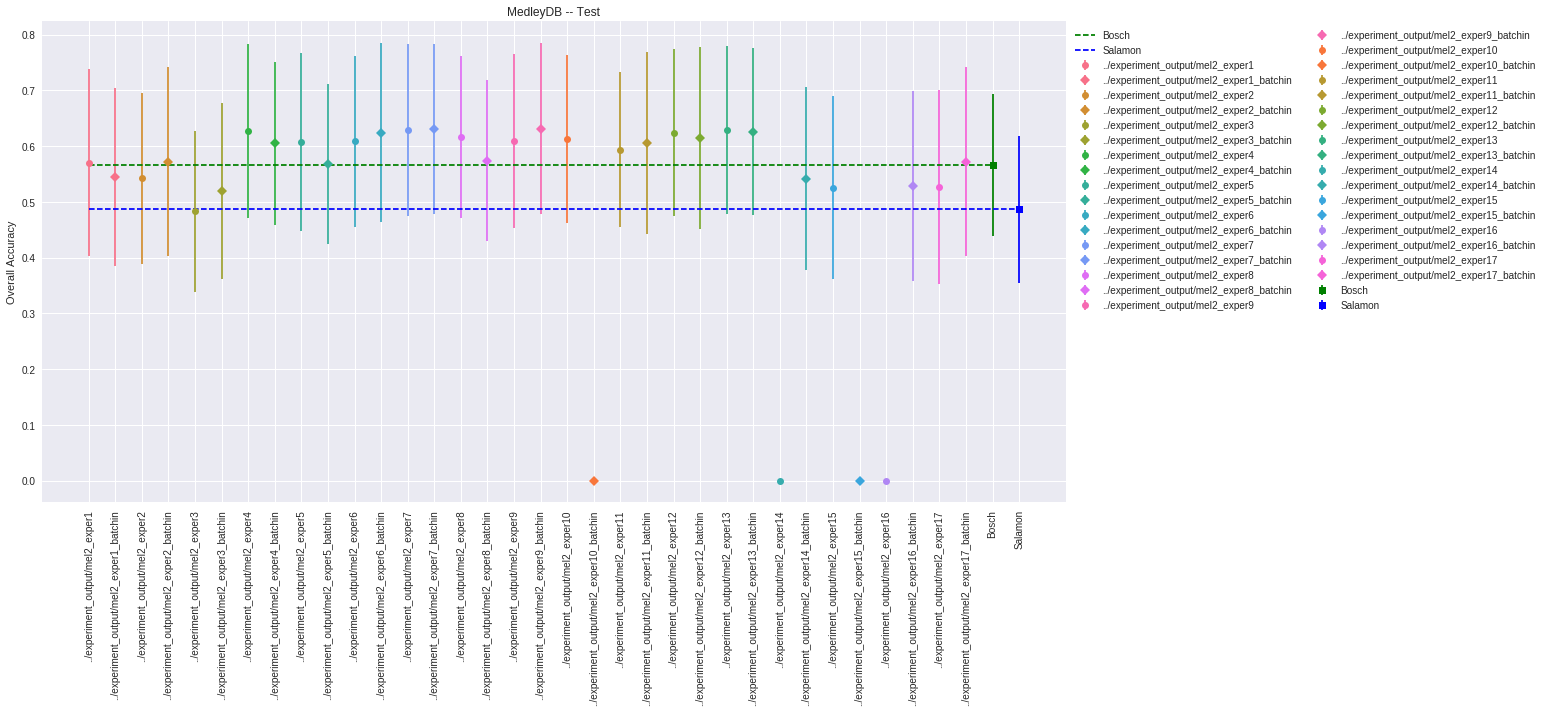

In [18]:
m = 'Overall Accuracy'

tick_colors = sns.color_palette('husl', 17)
formats = ['o', 'D']


plt.figure(figsize=(15, 10))
plt.title("MedleyDB -- Test")
bosch_mean = juanjo_scores[m].mean()
bosch_std = juanjo_scores[m].std()
salamon_mean = melodia_scores[m].mean()
salamon_std = melodia_scores[m].std()

plt.plot([0, 34], [bosch_mean, bosch_mean], '--', color='g', label='Bosch')
plt.plot([0, 35], [salamon_mean, salamon_mean], '--', color='b', label='Salamon')
x_labs = []
for j, k in enumerate(mdb_models):
    fmt = formats[j % 2]
    if j % 2 == 0:
        color = tick_colors[j % 17]
    else:
        color = tick_colors[(j-1) % 17]
    plt.errorbar(j, mdb_mean[m][j], yerr=mdb_std[m][j], fmt=fmt, label=k, color=color)
    x_labs.append(k)
plt.errorbar(j+1, bosch_mean, bosch_std, fmt='s', label='Bosch', color='g')
plt.errorbar(j+2, salamon_mean, salamon_std, fmt='s', label='Salamon', color='b')

print("{} models".format(len(mdb_models)))
plt.xticks(range(len(mdb_models)) + [34, 35], x_labs + ['Bosch', 'Salamon'], rotation='vertical')
plt.ylabel(m)
plt.legend(ncol=2, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("../paper-figs/all_results_mdbtest_mel2.pdf", format='pdf')
